# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)
import scipy
import seaborn as sns

In [2]:
from Functions import get_param_names

## Directories etc.

In [3]:
data_save_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data"
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

# Get data

In [4]:
all_data = pd.read_csv(os.path.join(data_save_path, 'all_data.csv'), index_col=0)
all_data_z = pd.read_csv(os.path.join(data_save_path, 'all_data_z.csv'), index_col=0)
all_data_long = pd.read_csv(os.path.join(data_save_path, 'all_data_long.csv'), index_col=0)
all_data_long_z = pd.read_csv(os.path.join(data_save_path, 'all_data_long_z.csv'), index_col=0)

In [5]:
param_cols = [c for c in all_data.columns for p in get_param_names() if p in c]

## Correlation between features

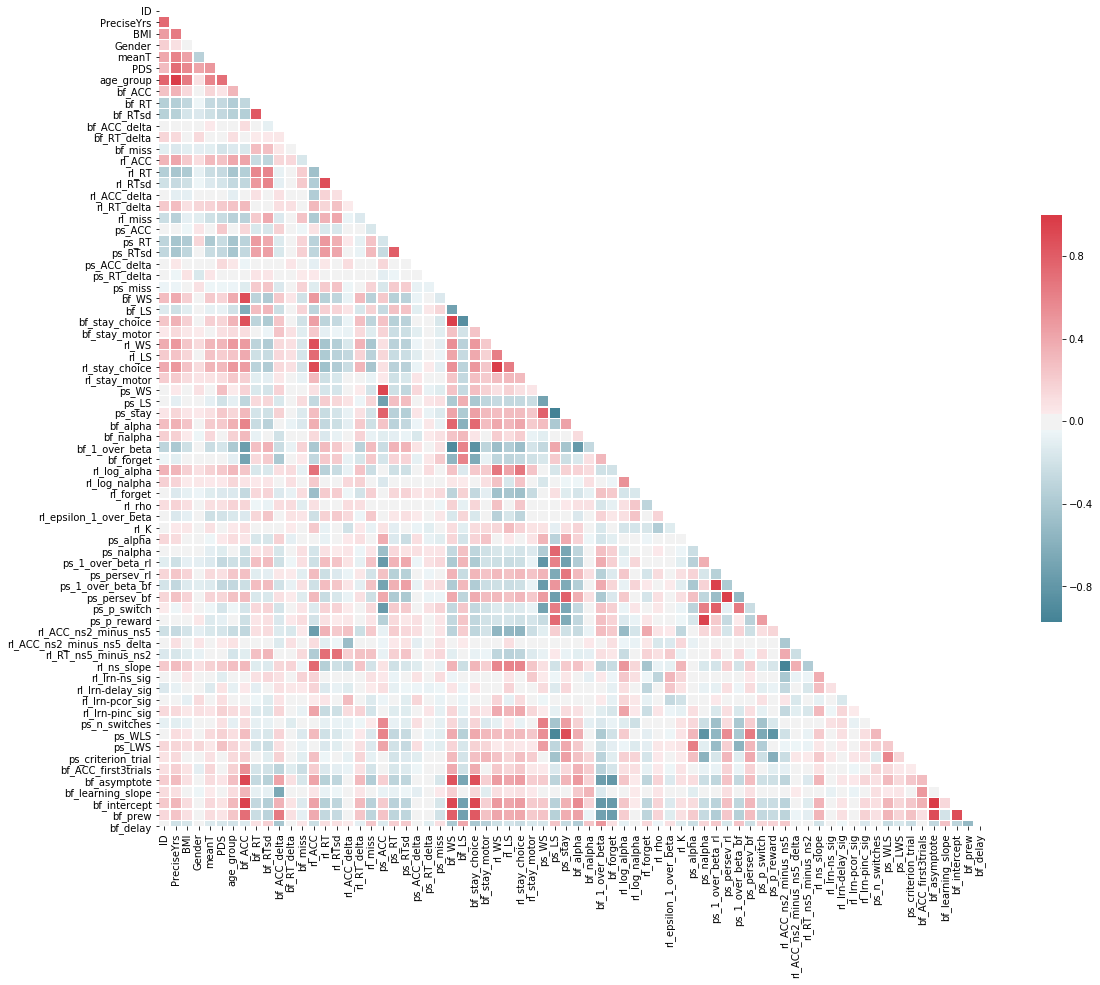

In [6]:
# Compute the correlation matrix
corr = scipy.stats.spearmanr(all_data, nan_policy='omit').correlation
corr = pd.DataFrame(corr, columns=all_data.columns, index=all_data.columns)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig(os.path.join(plot_save_path, '2_CorrMatrixAll.png'))

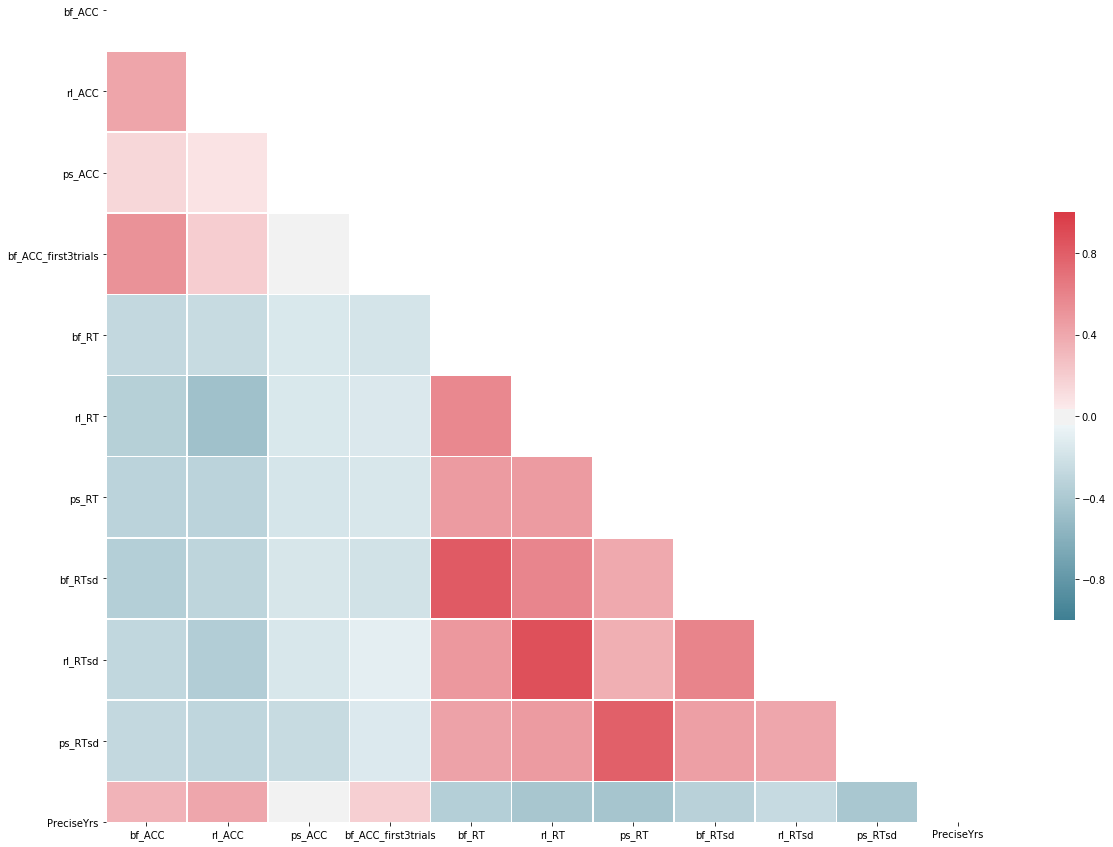

In [7]:
# Correlations between ACCs and RTs in different tasks
rt_cols = [col for col in all_data.columns if
           ('RT' in col) and ('sd' not in col) and ('delta' not in col) and ('minus' not in col)]
rtsd_cols = [col for col in all_data.columns if 'RTsd' in col]
acc_cols = [col for col in all_data.columns if
            ('ACC' in col) and ('delta' not in col) and ('minus' not in col)]

# Compute the correlation matrix
dat = all_data[acc_cols + rt_cols + rtsd_cols + ['PreciseYrs']]
corr = scipy.stats.spearmanr(dat, nan_policy='omit').correlation
corr = pd.DataFrame(corr, columns=dat.columns, index=dat.columns)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig(os.path.join(plot_save_path, '2_CorrMatrixAccRt.png'))

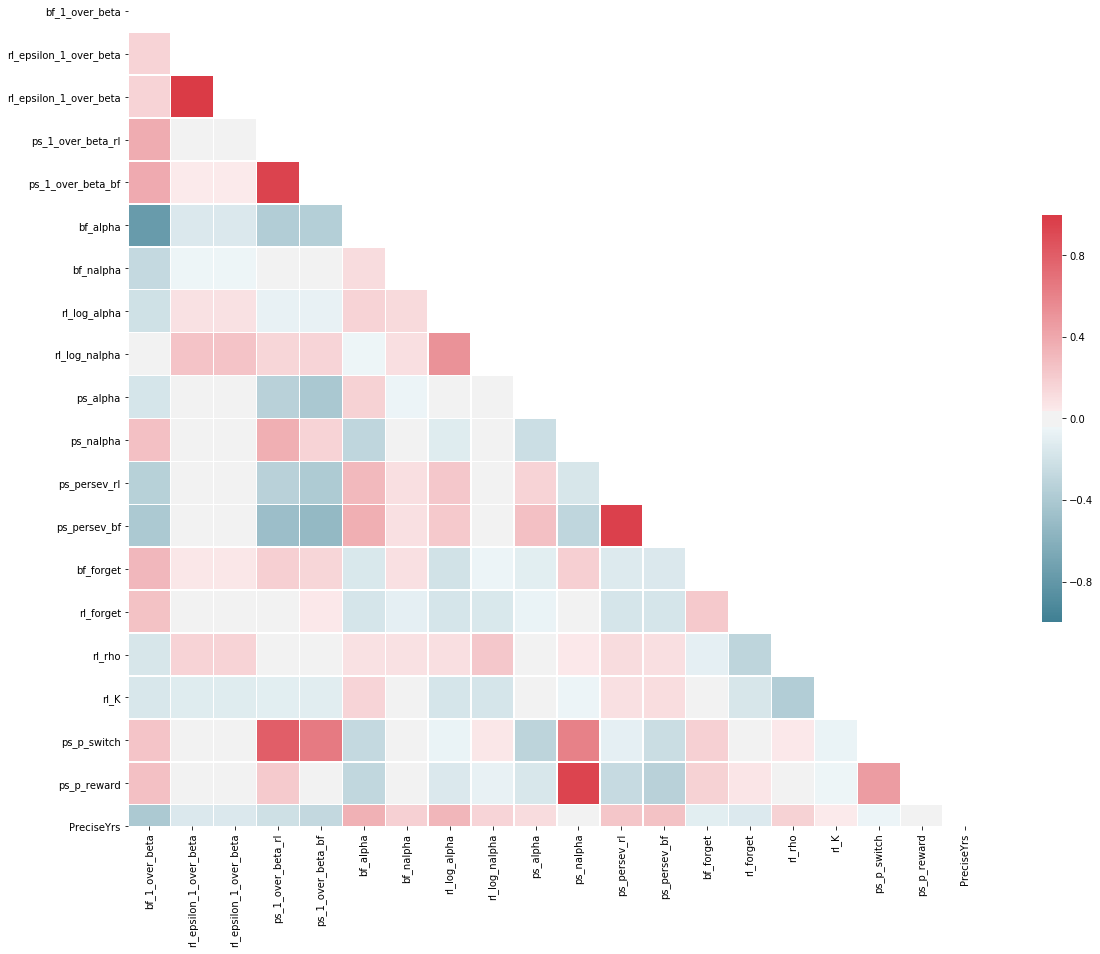

In [8]:
# Correlations between parameters in different tasks
param_cols_by_param = [
    p for p in param_cols if 'beta' in p] + [
    p for p in param_cols if 'alpha' in p] + [
    p for p in param_cols if 'persev' in p] + [
    p for p in param_cols if 'forget' in p] + [
    p for p in param_cols if ('beta' not in p) and ('alpha' not in p) and ('persev' not in p) and ('forget' not in p)
]

# Compute the correlation matrix
dat = all_data[param_cols_by_param + ['PreciseYrs']]
corr = scipy.stats.spearmanr(dat, nan_policy='omit').correlation
corr = pd.DataFrame(corr, columns=dat.columns, index=dat.columns)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig(os.path.join(plot_save_path, '2_CorrMatrixPar.png'))